In [680]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [681]:
g = nx.Graph()

In [682]:
#loading nodes 
filepath = 'NodeCoordinates.txt'  
with open(filepath) as fp:
    line = fp.readline()
    pos = {}
    node_list = []
    while line:
        new_line = line.strip().split(" ")
        node_list.append(new_line[0])
        pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
        line = fp.readline()

In [683]:
#loading edges
filepath = 'AdjacencyMatrix.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    while line:
        new_line = line.strip().split("\t")
        if len(new_line)>1:
            adjacency = new_line[1].strip().split(" ")
            i = 0
            while i < len(adjacency):
                g.add_edge(new_line[0], adjacency[i])
                i +=1
        line = fp.readline()

In [684]:
g.number_of_nodes()

400

In [685]:
g.number_of_edges()

8977

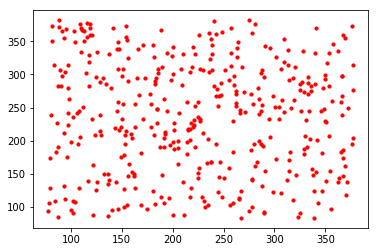

In [686]:
#draw only the edges of the graph
nx.draw_networkx_nodes(g,pos,node_size=10,nodelist=node_list, with_labels=False)


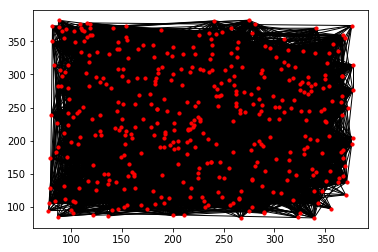

In [687]:
#As the graph is highly connected, we won't be able to appreciate clearly the edges.
nx.draw_networkx(g,pos,node_size=10,nodelist=node_list,node_color='r', with_labels=False)

In [688]:
#loading colors 
filepath = 'NodeColors.txt'  
with open(filepath) as fp:
    line = fp.readline()
    color_map = []
    while line:
        new_line = line.strip().split(" ")
        color_map.append(new_line[1])
        line = fp.readline()

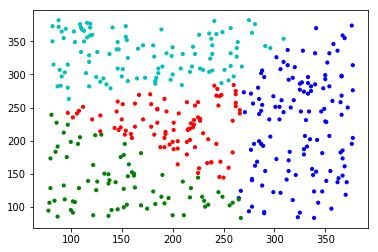

In [689]:
#color the final comunities of the graph
nx.draw_networkx_nodes(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)

In [690]:
#ploting the communities centers in black
filepath = 'NodeCenters.txt'  
with open(filepath) as fp:
    line = fp.readline()
    while line:
        new_line = line.strip().split(" ")
        node_list.append(new_line[0])
        pos[new_line[0]] = (int(new_line[1]), int(new_line[2]))
        tmpString = new_line[0]
        if tmpString[0] == 'c':
            color_map.append('black')
        else:
            color_map.append('gold')
        line = fp.readline()

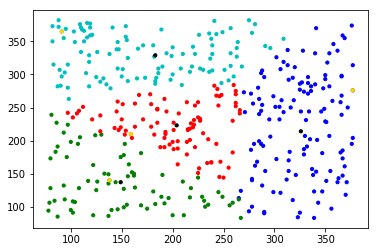

In [691]:
nx.draw_networkx_nodes(g,pos, node_color = color_map, node_size=10,nodelist=node_list, with_labels=False)